<a href="https://colab.research.google.com/github/carmeniturbe/sales-predictions/blob/main/Project_1_Part_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Cleaning Steps

In [43]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [44]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

filename = "/content/drive/MyDrive/Colab Notebooks/Data Science - Coding Dojo/Proyectos Data Science/Project 1 - Sales Predictions/sales_predictions_2023.csv"

df = pd.read_csv(filename)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [45]:
# Cheking for number of rows and colums
df.shape

(8523, 12)

In [46]:
# Cheking for data types of rows and colums only
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [47]:
# Cheking for duplicates -- Count the duplicates
df.duplicated()
df.duplicated().sum()

0

In [48]:
# General overview
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [49]:
# Examine the number of unique values in columns
df.nunique()

Item_Identifier              1559
Item_Weight                   415
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [50]:
# Identifying missing values
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [51]:
# We'll remove the Item Weight column because there is likely little or no correlation between the item's weight and its likelihood of being sold.
df = df.drop(columns=['Item_Weight'])
df.head()


,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [52]:

# Identifying missing values
df.isna().sum()

Item_Identifier                 0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

Below we'll evaluation the relation between the missing values and the Item Outlet sales column to fill out the 2410 missing values avilable in the Outlet_Size column

In [53]:
#Calculating mean sales
df.groupby('Outlet_Size')['Item_Outlet_Sales'].mean()


Outlet_Size
High      2298.995256
Medium    2681.603542
Small     1912.149161
Name: Item_Outlet_Sales, dtype: float64

In [54]:
#Calculating mean sales of missing values
mean_sales_for_missing_outlet_size = df.loc[df['Outlet_Size'].isnull(), 'Item_Outlet_Sales'].mean()
print(mean_sales_for_missing_outlet_size)

1822.6269474688797


In [55]:
#Calculating sales ranges
sales_range_by_size = df.groupby('Outlet_Size')['Item_Outlet_Sales'].apply(lambda x: x.max() - x.min())
print(sales_range_by_size)

Outlet_Size
High      10183.4110
Medium    13017.7216
Small      9745.9804
Name: Item_Outlet_Sales, dtype: float64


In [56]:
#Calculating sales range of missing valuess
range_for_missing_values = df.loc[df['Outlet_Size'].isnull(), 'Item_Outlet_Sales'].max() - df.loc[df['Outlet_Size'].isnull(), 'Item_Outlet_Sales'].min()
print("Range for missing values:", range_for_missing_values)

Range for missing values: 9631.4628


The mean of the missing values is similar to the mean of the small outlets. We confirmed this by calculating the range, which also returned a similar result. Based on these findings, we concluded that the best approach is to fill the missing values in the Outlet_Size column with the value 'Small'.

In [57]:
#Filling out missing values and verifying there aren't any other missing values.
df['Outlet_Size'].fillna('Small', inplace=True)
df.isna().sum()

Item_Identifier              0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [58]:
df.head()

,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [59]:
#Checking the types of outlets
df['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [60]:
#it makes sence to move all the supermarkets into the same category
df['Outlet_Type']= df['Outlet_Type'].replace(["Supermarket Type1","Supermarket Type2","Supermarket Type3"], "Supermarket")
df['Outlet_Type'].value_counts()

Supermarket      7440
Grocery Store    1083
Name: Outlet_Type, dtype: int64

In [61]:
# Check the unique values and counts of the 'Item_Fat_Content' column
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [62]:
# Standardize the values in the 'Item_Fat_Content' column
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({'LF': 'Low Fat', 'reg': 'Regular', 'low fat': 'Low Fat'})
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [63]:
# Summary stats of the Item_Outlet_Sales column
df['Item_Outlet_Sales'].describe().round(2)

count     8523.00
mean      2181.29
std       1706.50
min         33.29
25%        834.25
50%       1794.33
75%       3101.30
max      13086.96
Name: Item_Outlet_Sales, dtype: float64

# Data Visualization

<ipython-input-64-868b141d87e3>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


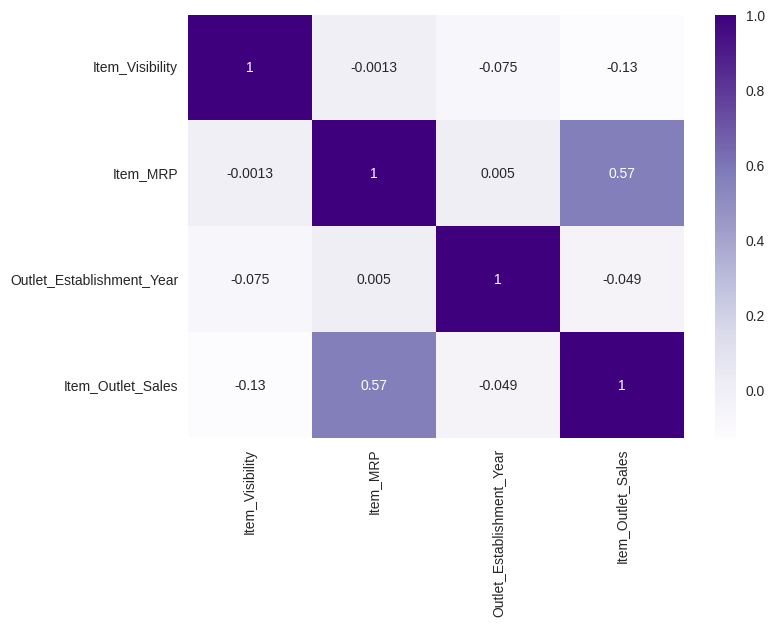

In [64]:
#heatmap first to indicate some relationships
corr = df.corr()
sns.heatmap(corr, cmap = 'Purples', annot = True);
#Ther is a moderate relationship between Item_Outlet_Sales and Item_MRP

Text(0, 0.5, 'Outlets')

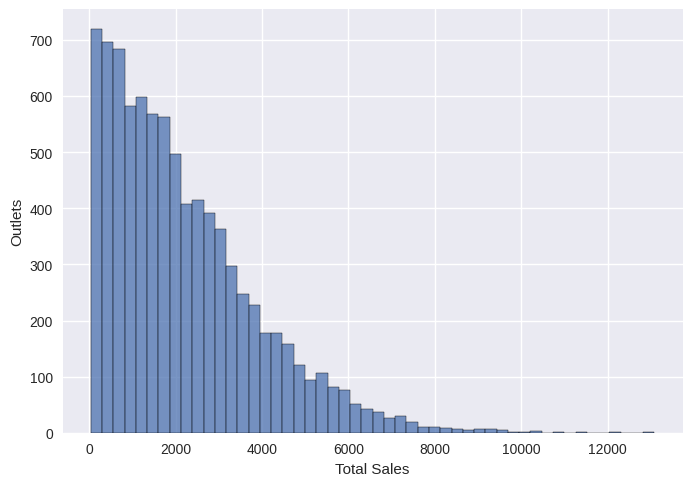

In [65]:
#item outlet sales histogram
item_outlet_sales = df['Item_Outlet_Sales']
sns.histplot(item_outlet_sales, bins=50, kde=False)
plt.xlabel('Total Sales');
plt.ylabel('Outlets')
#the data exhibits a marked negative skewness, indicating that the majority of outlets have total sales around ± 2000. This skewness suggests that there are relatively few outlets with higher total sales, while a larger number of outlets have sales closer to the average value

<ipython-input-66-ee4be6a76d4b>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


Text(0, 0.5, 'Number of Items')

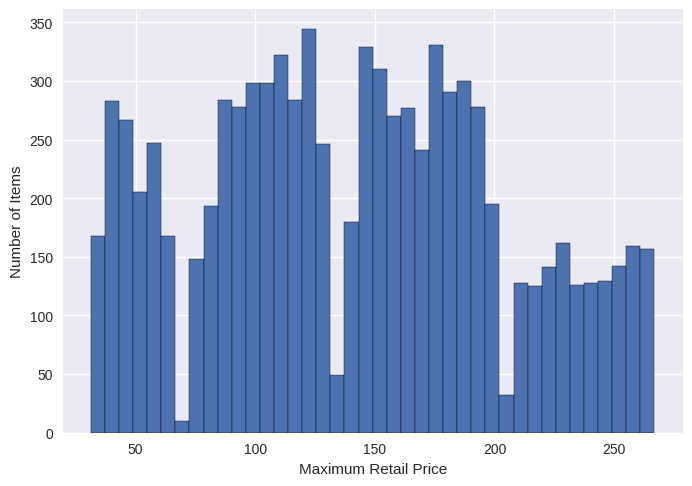

In [66]:
#MRPs histogram
plt.style.use('seaborn')
df['Item_MRP'].hist(bins = 40,edgecolor='black')
plt.xlabel('Maximum Retail Price')
plt.ylabel('Number of Items')

<Axes: >

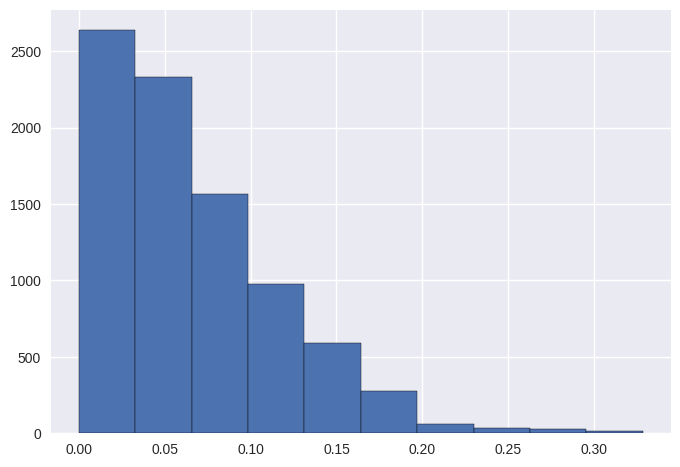

In [67]:
df['Item_Visibility'].hist(bins = 10,edgecolor = 'black')
#more items have lower visibility

<Axes: >

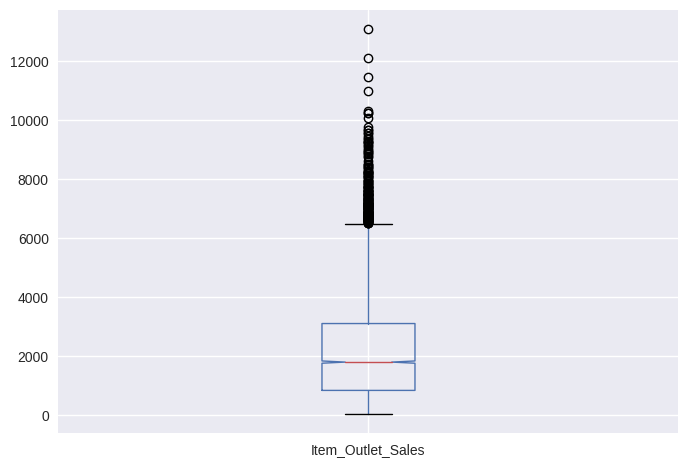

In [68]:
df.boxplot(column = 'Item_Outlet_Sales', notch = True)
#This boxplot confirms what we just saw in the histogram, the data is likely right skewed
#however, outliers may not mean they are not erroneous or relevant, but just that they are far from my mean stat

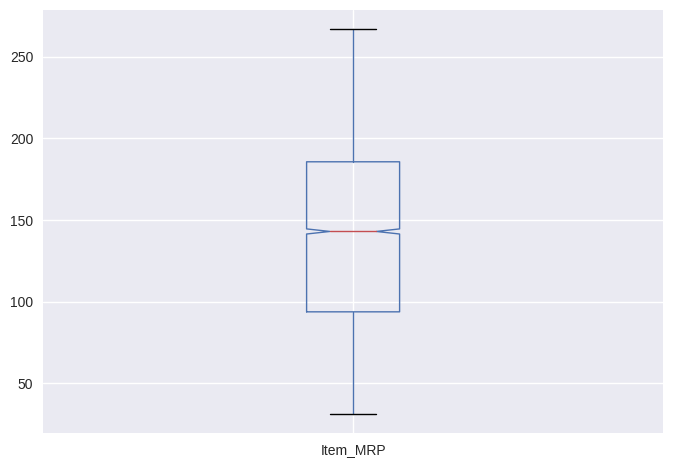

In [69]:
#MRP
df.boxplot(column= 'Item_MRP', notch = True);
#No outliers on the MRP

Text(0.5, 0.98, 'Number of Grocery Stores and Supermarkets')

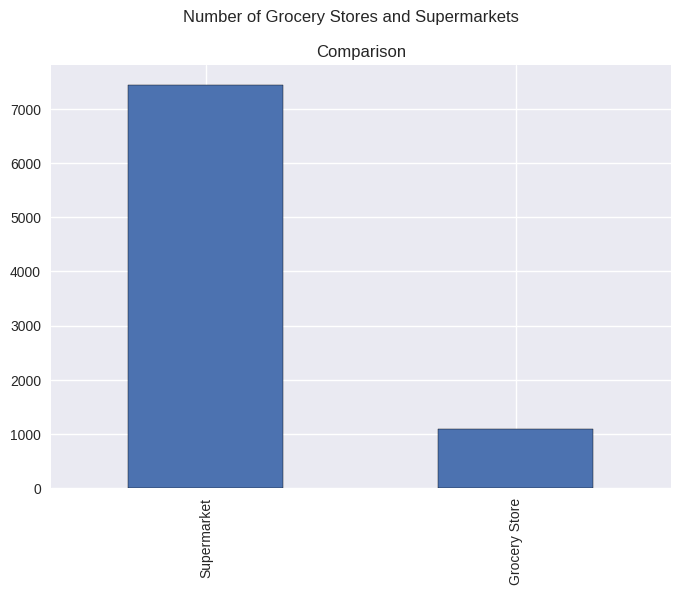

In [70]:
df['Outlet_Type'].value_counts().plot(kind = 'bar',edgecolor = 'black')
plt.title('Comparison')
plt.suptitle('Number of Grocery Stores and Supermarkets')
# There are more supermakets than Grocery Stores